<a href="https://colab.research.google.com/github/Tej1109/MLP_Pracs/blob/main/Tejas_MLP_Prac_6_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv("/content/spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
df['Category'].value_counts() #Theres a class imbalance, we will handle this during train test sampling by stratified sampling

,count
Category,
ham,4825
spam,747


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = "english") #handles most preprocessing, removing punctuations, stopwords,lowercasing etc
X = vectorizer.fit_transform(df['Message'])
Y = df['Category']


In [16]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 43529 stored elements and shape (5572, 8440)>

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((4457, 8440), (4457,), (1115, 8440), (1115,))

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model1 = MultinomialNB()
model1.fit(X_train,Y_train)
print("Model 1(Multionomial NB) score on training :",model1.score(X_train,Y_train))
preds1 = model1.predict(X_test)

model2 = LogisticRegression()
model2.fit(X_train,Y_train)
print("Model 2(Logistic Reg) score on training :",model2.score(X_train,Y_train))
preds2 = model2.predict(X_test)

model3 =RandomForestClassifier()
model3.fit(X_train,Y_train)
print("Model 3(RandomForest) score on training :",model3.score(X_train,Y_train))
preds3 = model3.predict(X_test)



Model 1(Multionomial NB) score on training : 0.9807045097599282
Model 2(Logistic Reg) score on training : 0.969710567646399
Model 3(RandomForest) score on training : 1.0



=== MultinomialNB ===
Accuracy: 0.9695067264573991
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       956
        spam       1.00      0.79      0.88       159

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



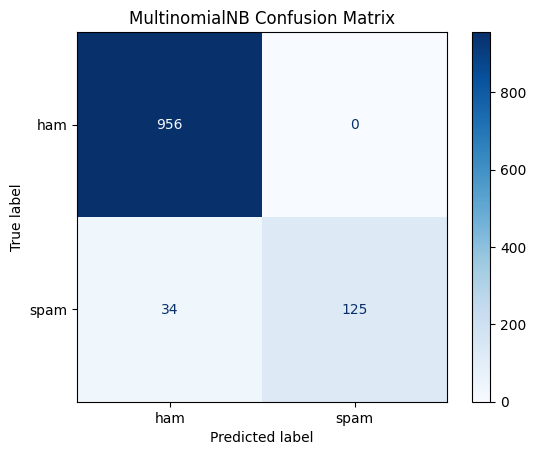


=== LogisticRegression ===
Accuracy: 0.9461883408071748
              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       956
        spam       0.99      0.63      0.77       159

    accuracy                           0.95      1115
   macro avg       0.97      0.81      0.87      1115
weighted avg       0.95      0.95      0.94      1115



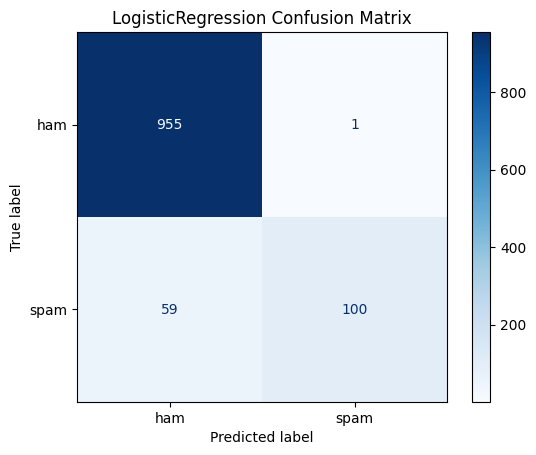


=== RandomForest ===
Accuracy: 0.9713004484304932
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       956
        spam       1.00      0.80      0.89       159

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



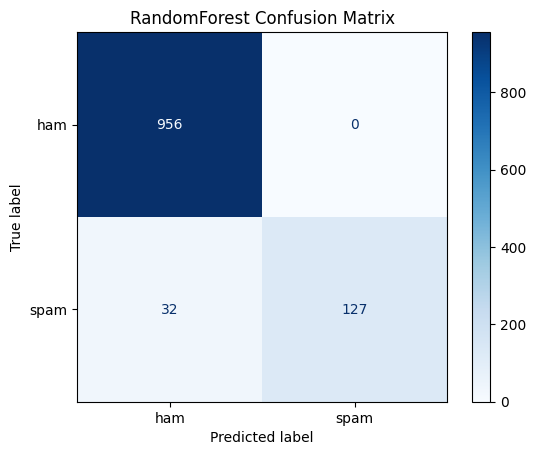

In [21]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models = {
    "MultinomialNB": preds1,
    "LogisticRegression": preds2,
    "RandomForest": preds3
}

for name, y_pred in models.items():
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay.from_predictions(
        Y_test, y_pred, cmap=plt.cm.Blues, display_labels=["ham", "spam"]
    )
    disp.ax_.set_title(f"{name} Confusion Matrix")
    plt.show()
